# 0.IMPORTS

## 0.1. Importing libraries

In [1]:
import pandas   as pd
import seaborn  as sns
import numpy    as np

import ydata_profiling
import matplotlib.pyplot as plt
import math

## 0.2. Loading data

In [2]:
stores         = pd.read_csv('datasets/stores.csv', low_memory=False)
train          = pd.read_csv('datasets/train.csv', low_memory=False)
train_features = pd.read_csv('datasets/train_features.csv', low_memory=False)

test = pd.read_csv('datasets/test.csv', low_memory=False)
test_features = pd.read_csv('datasets/test_features.csv', low_memory=False)

In [3]:
train_features.head()

,loja,data,temperatura,combustivel,desconto_1,desconto_2,desconto_3,desconto_4,desconto_5,desemprego,feriado,distancia_competidores,clientes
0,4,01-07,4.077778,2.980,NaN,NaN,NaN,NaN,NaN,0.06510,nao,NaN,216
1,32,01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08818,nao,NaN,3
2,1,01-07,9.038889,2.976,NaN,NaN,NaN,NaN,NaN,0.07742,nao,NaN,160
3,7,01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08818,nao,NaN,739
4,43,01-07,4.705556,NaN,NaN,NaN,NaN,NaN,NaN,0.10398,nao,NaN,998


## 0.3. Helper functions

In [4]:
# Função para renomear as colunas do dataframe
def rename_columns(cols):
    cols = list(map(lambda x: inflection.titleize(x), cols))
    cols = list(map(lambda x: x.replace(" ", ""), cols))
    cols = list(map(lambda x: x.replace(".", ""), cols))
    cols = list(map(lambda x: inflection.underscore(x), cols))
    return cols

# Função que retorna uma tabela de únicos e suas respectivas quantidades
def tab_unique(df):
    tab_unicos = pd.DataFrame(df.nunique())
    tab_unicos.columns= ['count']
    tab_unicos['content'] = df.apply(lambda x: x.unique())
    return tab_unicos

## 0.4. Dicionário de dados

# 1. DATA DESCRIPTION

## 1.1. Unir tabelas

In [5]:
df = pd.merge(train, stores, on='loja', how='inner')

In [6]:
df1 = pd.merge(df, train_features, on=['loja', 'data', 'feriado'], how='inner')

## 1.2. Data Dimensions

In [7]:
df1.head()

,id,loja,setor,data,vendas_semanais,feriado,tipo,tamanho,temperatura,combustivel,desconto_1,desconto_2,desconto_3,desconto_4,desconto_5,desemprego,distancia_competidores,clientes
0,140679,17,93,01-07,6283.00,nao,eletronico,93188.0,-14.316667,2.891,NaN,NaN,NaN,NaN,NaN,0.06866,NaN,541
1,140696,17,16,01-07,1641.25,nao,eletronico,93188.0,-14.316667,2.891,NaN,NaN,NaN,NaN,NaN,0.06866,NaN,541
2,140701,17,4,01-07,39775.45,nao,eletronico,93188.0,-14.316667,2.891,NaN,NaN,NaN,NaN,NaN,0.06866,NaN,541
3,140733,17,14,01-07,29555.43,nao,eletronico,93188.0,-14.316667,2.891,NaN,NaN,NaN,NaN,NaN,0.06866,NaN,541
4,140742,17,48,01-07,414.00,nao,eletronico,93188.0,-14.316667,2.891,NaN,NaN,NaN,NaN,NaN,0.06866,NaN,541


In [8]:
print('Quantidade de linhas: {:,}'.format(df1.shape[0]))
print('Quantidade de colunas: {:,}'.format(df1.shape[1]))

Quantidade de linhas: 135,385
Quantidade de colunas: 18


## 1.3. Check NA's

In [9]:
df1.isna().sum()

id                             0
loja                           0
setor                          0
data                           0
vendas_semanais            12862
feriado                        0
tipo                           0
tamanho                    33327
temperatura                47945
combustivel                52989
desconto_1                129459
desconto_2                129510
desconto_3                129746
desconto_4                130184
desconto_5                129459
desemprego                     0
distancia_competidores    129459
clientes                       0
dtype: int64

In [10]:
stores.isna().sum()

loja        0
tipo        0
tamanho    11
dtype: int64

In [11]:
stores['loja'].nunique()

45

## 1.4. Data Types

## 1.5. Check duplicated

## 1.6. Datetime

# 2. TRATAMENTO E FEATURE ENGINEERING

In [12]:
df2 = df1.copy()

## 2.1. Criação das Hipóteses

## 2.2. Transformar e converter

### 2.2.1. Preencher NA´s

#### 2.2.1.1. Excluir os registros com vendas semanais nula ou menor 100

In [13]:
reg_faltantes = df2.loc[(df2['vendas_semanais'].isna()) | (df2['vendas_semanais'] < 100), :].index
df2.drop(reg_faltantes, axis=0, inplace=True)

In [14]:
df2.reset_index(inplace=True,drop=True)
df2.tail()

,id,loja,setor,data,vendas_semanais,feriado,tipo,tamanho,temperatura,combustivel,desconto_1,desconto_2,desconto_3,desconto_4,desconto_5,desemprego,distancia_competidores,clientes
114833,275307,33,90,11-18,23462.71,nao,eletrodomestico,39690.0,NaN,3.669,86.59,6.0,NaN,NaN,3220.86,0.0801,1952.0,156
114834,275374,33,96,11-18,10445.16,nao,eletrodomestico,39690.0,NaN,3.669,86.59,6.0,NaN,NaN,3220.86,0.0801,1952.0,156
114835,275387,33,95,11-18,25464.21,nao,eletrodomestico,39690.0,NaN,3.669,86.59,6.0,NaN,NaN,3220.86,0.0801,1952.0,156
114836,275397,33,98,11-18,7730.53,nao,eletrodomestico,39690.0,NaN,3.669,86.59,6.0,NaN,NaN,3220.86,0.0801,1952.0,156
114837,275405,33,97,11-18,4665.16,nao,eletrodomestico,39690.0,NaN,3.669,86.59,6.0,NaN,NaN,3220.86,0.0801,1952.0,156


#### 2.2.1.2. Preencher os descontos com valores nulos com 0

In [15]:
df2['desconto_1'] = df2['desconto_1'].fillna(0)
df2['desconto_2'] = df2['desconto_2'].fillna(0)
df2['desconto_3'] = df2['desconto_3'].fillna(0)
df2['desconto_4'] = df2['desconto_4'].fillna(0)
df2['desconto_5'] = df2['desconto_5'].fillna(0)

#### 2.2.1.3. Preencher o tamanho das lojas faltantes com 0 e considerar online

In [16]:
tam_faltantes = df2.loc[df2['tamanho'].isna(), :].index

In [17]:
df2['tamanho'] = df2['tamanho'].apply(lambda x: 0 if math.isnan(x) else x)

In [18]:
df2.iloc[tam_faltantes, :]

,id,loja,setor,data,vendas_semanais,feriado,tipo,tamanho,temperatura,combustivel,desconto_1,desconto_2,desconto_3,desconto_4,desconto_5,desemprego,distancia_competidores,clientes
5329,140681,3,25,01-07,2658.57,nao,eletronico,0.0,11.861111,NaN,0.00,0.00,0.0,0.00,0.0,0.07551,NaN,901
5330,141029,3,20,01-07,1358.81,nao,eletronico,0.0,11.861111,NaN,0.00,0.00,0.0,0.00,0.0,0.07551,NaN,901
5331,141077,3,34,01-07,3280.50,nao,eletronico,0.0,11.861111,NaN,0.00,0.00,0.0,0.00,0.0,0.07551,NaN,901
5332,141106,3,23,01-07,6530.88,nao,eletronico,0.0,11.861111,NaN,0.00,0.00,0.0,0.00,0.0,0.07551,NaN,901
5333,141169,3,19,01-07,3113.76,nao,eletronico,0.0,11.861111,NaN,0.00,0.00,0.0,0.00,0.0,0.07551,NaN,901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113407,274985,11,71,11-18,9419.43,nao,eletrodomestico,0.0,NaN,NaN,10941.05,222.94,263.1,404.05,8885.3,0.07197,17997.0,953
113408,274997,11,67,11-18,9790.06,nao,eletrodomestico,0.0,NaN,NaN,10941.05,222.94,263.1,404.05,8885.3,0.07197,17997.0,953
113409,275011,11,79,11-18,26994.74,nao,eletrodomestico,0.0,NaN,NaN,10941.05,222.94,263.1,404.05,8885.3,0.07197,17997.0,953
113410,275018,11,74,11-18,18686.63,nao,eletrodomestico,0.0,NaN,NaN,10941.05,222.94,263.1,404.05,8885.3,0.07197,17997.0,953


#### 2.2.1.4. Preencher a temperatura faltantes usando a média

In [19]:
media = df2['temperatura'].mean()
media

15.588963417919134

In [20]:
temp_faltantes = df2.loc[df2['temperatura'].isna(), :].index

In [21]:
%%time
df2['temperatura'] = df2['temperatura'].apply(lambda x: media if math.isnan(x) else x)

CPU times: total: 62.5 ms
Wall time: 114 ms


In [22]:
df2.iloc[temp_faltantes, :]

,id,loja,setor,data,vendas_semanais,feriado,tipo,tamanho,temperatura,combustivel,desconto_1,desconto_2,desconto_3,desconto_4,desconto_5,desemprego,distancia_competidores,clientes
121,146595,17,6,01-21,4548.82,nao,eletronico,93188.0,15.588963,2.934,0.00,0.0,0.0,0.0,0.00,0.06866,NaN,422
122,146907,17,1,01-21,16137.30,nao,eletronico,93188.0,15.588963,2.934,0.00,0.0,0.0,0.0,0.00,0.06866,NaN,422
123,146975,17,2,01-21,39712.80,nao,eletronico,93188.0,15.588963,2.934,0.00,0.0,0.0,0.0,0.00,0.06866,NaN,422
124,146986,17,3,01-21,16762.49,nao,eletronico,93188.0,15.588963,2.934,0.00,0.0,0.0,0.0,0.00,0.06866,NaN,422
125,147010,17,4,01-21,22773.89,nao,eletronico,93188.0,15.588963,2.934,0.00,0.0,0.0,0.0,0.00,0.06866,NaN,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114833,275307,33,90,11-18,23462.71,nao,eletrodomestico,39690.0,15.588963,3.669,86.59,6.0,0.0,0.0,3220.86,0.08010,1952.0,156
114834,275374,33,96,11-18,10445.16,nao,eletrodomestico,39690.0,15.588963,3.669,86.59,6.0,0.0,0.0,3220.86,0.08010,1952.0,156
114835,275387,33,95,11-18,25464.21,nao,eletrodomestico,39690.0,15.588963,3.669,86.59,6.0,0.0,0.0,3220.86,0.08010,1952.0,156
114836,275397,33,98,11-18,7730.53,nao,eletrodomestico,39690.0,15.588963,3.669,86.59,6.0,0.0,0.0,3220.86,0.08010,1952.0,156


#### 2.2.1.5. Preencher os registros com combustível faltantes usando a média

In [23]:
media = df2['combustivel'].mean()
media

3.596657919601641

In [24]:
comb_faltantes = df2.loc[df2['combustivel'].isna(), :].index

In [25]:
%%time
df2['combustivel'] = df2['combustivel'].apply(lambda x: media if math.isnan(x) else x)

CPU times: total: 78.1 ms
Wall time: 95.6 ms


In [26]:
df2.iloc[comb_faltantes, :]

,id,loja,setor,data,vendas_semanais,feriado,tipo,tamanho,temperatura,combustivel,desconto_1,desconto_2,desconto_3,desconto_4,desconto_5,desemprego,distancia_competidores,clientes
356,158299,17,24,02-18,3652.300000,nao,eletronico,93188.0,-2.855556,3.596658,0.0,0.0,0.0,0.0,0.0,0.06866,NaN,956
357,158421,17,20,02-18,3273.070000,nao,eletronico,93188.0,-2.855556,3.596658,0.0,0.0,0.0,0.0,0.0,0.06866,NaN,956
358,158480,17,58,02-18,1200.000000,nao,eletronico,93188.0,-2.855556,3.596658,0.0,0.0,0.0,0.0,0.0,0.06866,NaN,956
359,158538,17,18,02-18,10202.870000,nao,eletronico,93188.0,-2.855556,3.596658,0.0,0.0,0.0,0.0,0.0,0.06866,NaN,956
360,158602,17,19,02-18,4271.550000,nao,eletronico,93188.0,-2.855556,3.596658,0.0,0.0,0.0,0.0,0.0,0.06866,NaN,956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114549,249118,33,92,09-16,35013.170000,nao,eletrodomestico,39690.0,29.883333,3.596658,0.0,0.0,0.0,0.0,0.0,0.08442,NaN,685
114550,249134,33,5,09-16,110.000000,nao,eletrodomestico,39690.0,29.883333,3.596658,0.0,0.0,0.0,0.0,0.0,0.08442,NaN,685
114551,249248,33,81,09-16,887907.904893,nao,eletrodomestico,39690.0,29.883333,3.596658,0.0,0.0,0.0,0.0,0.0,0.08442,NaN,685
114552,249292,33,90,09-16,25796.820000,nao,eletrodomestico,39690.0,29.883333,3.596658,0.0,0.0,0.0,0.0,0.0,0.08442,NaN,685


#### 2.2.1.6. Preencher os registros com distancia faltantes usando um número grande

In [27]:
comp_faltantes = df2.loc[df2['distancia_competidores'].isna(), :].index

In [28]:
%%time
df2['distancia_competidores'] = df2['distancia_competidores'].apply(lambda x: 300000 if math.isnan(x) else x)

CPU times: total: 31.2 ms
Wall time: 156 ms


In [29]:
df2.iloc[comb_faltantes, :]

,id,loja,setor,data,vendas_semanais,feriado,tipo,tamanho,temperatura,combustivel,desconto_1,desconto_2,desconto_3,desconto_4,desconto_5,desemprego,distancia_competidores,clientes
356,158299,17,24,02-18,3652.300000,nao,eletronico,93188.0,-2.855556,3.596658,0.0,0.0,0.0,0.0,0.0,0.06866,300000.0,956
357,158421,17,20,02-18,3273.070000,nao,eletronico,93188.0,-2.855556,3.596658,0.0,0.0,0.0,0.0,0.0,0.06866,300000.0,956
358,158480,17,58,02-18,1200.000000,nao,eletronico,93188.0,-2.855556,3.596658,0.0,0.0,0.0,0.0,0.0,0.06866,300000.0,956
359,158538,17,18,02-18,10202.870000,nao,eletronico,93188.0,-2.855556,3.596658,0.0,0.0,0.0,0.0,0.0,0.06866,300000.0,956
360,158602,17,19,02-18,4271.550000,nao,eletronico,93188.0,-2.855556,3.596658,0.0,0.0,0.0,0.0,0.0,0.06866,300000.0,956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114549,249118,33,92,09-16,35013.170000,nao,eletrodomestico,39690.0,29.883333,3.596658,0.0,0.0,0.0,0.0,0.0,0.08442,300000.0,685
114550,249134,33,5,09-16,110.000000,nao,eletrodomestico,39690.0,29.883333,3.596658,0.0,0.0,0.0,0.0,0.0,0.08442,300000.0,685
114551,249248,33,81,09-16,887907.904893,nao,eletrodomestico,39690.0,29.883333,3.596658,0.0,0.0,0.0,0.0,0.0,0.08442,300000.0,685
114552,249292,33,90,09-16,25796.820000,nao,eletrodomestico,39690.0,29.883333,3.596658,0.0,0.0,0.0,0.0,0.0,0.08442,300000.0,685


#### 2.2.1.7. Apagar a coluna de temperatura

In [30]:
df2.head()

,id,loja,setor,data,vendas_semanais,feriado,tipo,tamanho,temperatura,combustivel,desconto_1,desconto_2,desconto_3,desconto_4,desconto_5,desemprego,distancia_competidores,clientes
0,140679,17,93,01-07,6283.00,nao,eletronico,93188.0,-14.316667,2.891,0.0,0.0,0.0,0.0,0.0,0.06866,300000.0,541
1,140696,17,16,01-07,1641.25,nao,eletronico,93188.0,-14.316667,2.891,0.0,0.0,0.0,0.0,0.0,0.06866,300000.0,541
2,140701,17,4,01-07,39775.45,nao,eletronico,93188.0,-14.316667,2.891,0.0,0.0,0.0,0.0,0.0,0.06866,300000.0,541
3,140733,17,14,01-07,29555.43,nao,eletronico,93188.0,-14.316667,2.891,0.0,0.0,0.0,0.0,0.0,0.06866,300000.0,541
4,140742,17,48,01-07,414.00,nao,eletronico,93188.0,-14.316667,2.891,0.0,0.0,0.0,0.0,0.0,0.06866,300000.0,541


In [31]:
df2.drop('temperatura', axis=1, inplace=True)

### 2.2.2. Transformação de tipos

In [32]:
df2.dtypes

id                          int64
loja                        int64
setor                       int64
data                       object
vendas_semanais           float64
feriado                    object
tipo                       object
tamanho                   float64
combustivel               float64
desconto_1                float64
desconto_2                float64
desconto_3                float64
desconto_4                float64
desconto_5                float64
desemprego                float64
distancia_competidores    float64
clientes                    int64
dtype: object

#### 2.2.2.1 Transformar data nas colunas dia e mes

In [33]:
df2['data'] = pd.to_datetime(df2['data'] + '-2023', format='%m-%d-%Y')

In [34]:
df2["week_of_year"] = df2["data"].dt.strftime("%U")

#### 2.2.2.2. Transformar feriado em 0 e 1

In [35]:
df2['feriado'] = df2['feriado'].apply(lambda x: 1 if x == 'sim' else 0)

In [36]:
df2['feriado'].unique()

array([0, 1], dtype=int64)

## 2.3. Criar

### 2.3.1. Classificar as lojas pelo tamanho

In [37]:
q1 = df2['tamanho'].quantile(0.25)
q2 = df2['tamanho'].quantile(0.5)
q3 = df2['tamanho'].quantile(0.75)

In [38]:
df2['tipo_de_loja'] = df2['tamanho'].apply(lambda x: 'A' if x < q1 else
                                                     'B' if x < q3 else 'C')

In [39]:
df2.loc[:, ['tipo_de_loja', 'vendas_semanais']].groupby('tipo_de_loja').median()

,vendas_semanais
tipo_de_loja,
A,10141.975
B,7918.290
C,12331.350


### 2.3.2. Somar os desconto semana

In [40]:
df2['desconto'] = df2['desconto_1'] + df2['desconto_2'] + df2['desconto_3'] + df2['desconto_4'] + df2['desconto_5']

In [41]:
df2.drop(['desconto_1', 'desconto_2', 'desconto_3', 'desconto_4', 'desconto_5'], axis=1, inplace=True)

In [42]:
df2.head()

,id,loja,setor,data,vendas_semanais,feriado,tipo,tamanho,combustivel,desemprego,distancia_competidores,clientes,week_of_year,tipo_de_loja,desconto
0,140679,17,93,2023-01-07,6283.00,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
1,140696,17,16,2023-01-07,1641.25,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
2,140701,17,4,2023-01-07,39775.45,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
3,140733,17,14,2023-01-07,29555.43,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
4,140742,17,48,2023-01-07,414.00,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0


### 2.3.4. Remover os dias com desconto

In [43]:
reg_faltantes = df2.loc[df2['desconto'] > 0, :].index
df2.drop(reg_faltantes, axis=0, inplace=True)

df2.reset_index(inplace=True,drop=True)
df2.tail()

,id,loja,setor,data,vendas_semanais,feriado,tipo,tamanho,combustivel,desemprego,distancia_competidores,clientes,week_of_year,tipo_de_loja,desconto
109793,270035,33,2,2023-11-04,7008.400000,0,eletrodomestico,39690.0,3.828,0.0801,300000.0,259,44,B,0.0
109794,270074,33,7,2023-11-04,231.710000,0,eletrodomestico,39690.0,3.828,0.0801,300000.0,259,44,B,0.0
109795,270078,33,87,2023-11-04,399.360000,0,eletrodomestico,39690.0,3.828,0.0801,300000.0,259,44,B,0.0
109796,270095,33,5,2023-11-04,890215.052507,0,eletrodomestico,39690.0,3.828,0.0801,300000.0,259,44,B,0.0
109797,270115,33,1,2023-11-04,6531.230000,0,eletrodomestico,39690.0,3.828,0.0801,300000.0,259,44,B,0.0


### 2.4.3. Separar vendas por loja

In [44]:
setor_por_dia = df2.groupby(['data', 'setor'])['vendas_semanais'].mean().reset_index()

In [45]:
setor_por_dia

,data,setor,vendas_semanais
0,2023-01-07,1,113848.322764
1,2023-01-07,2,117859.230165
2,2023-01-07,3,98052.430083
3,2023-01-07,4,108155.796432
4,2023-01-07,5,19486.681500
...,...,...,...
3282,2023-11-04,94,67569.841535
3283,2023-11-04,95,104736.469893
3284,2023-11-04,96,185102.759271
3285,2023-11-04,97,76370.629064


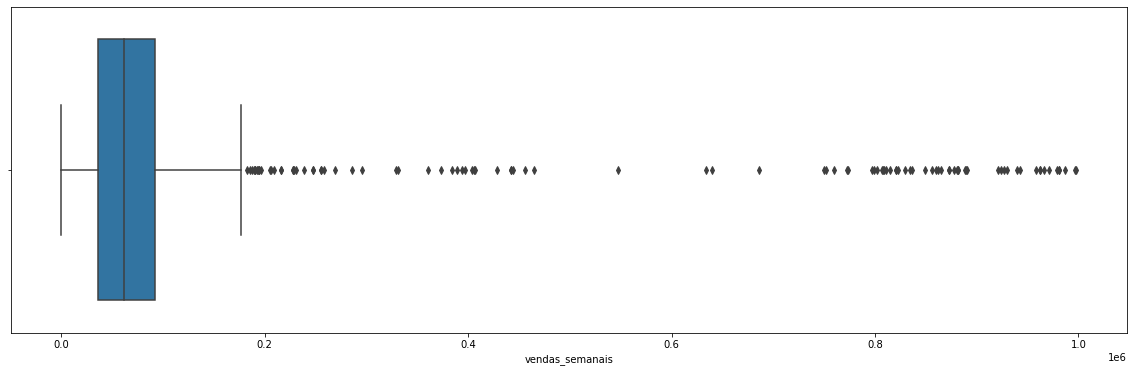

In [46]:
# Criando o boxplot com seaborn e ajustando o tamanho da figura
plt.figure(figsize=(20, 6))  # Defina o tamanho desejado, por exemplo, (largura, altura)
sns.boxplot(x=setor_por_dia['vendas_semanais'])
plt.show()

In [47]:
aux = df2.copy()

#vendas_por_loja = aux.groupby(['loja', 'data'])['vendas_semanais'].sum().reset_index()
#vendas_por_loja

total_vendas_por_loja = aux.groupby(['loja', 'data'])['vendas_semanais'].sum().reset_index()

total_vendas_por_loja.rename(columns={'vendas_semanais': 'total_vendas_loja'}, inplace=True)

aux = pd.merge(aux, total_vendas_por_loja, on='loja', how='left')

aux.drop(['id', 'setor', 'vendas_semanais'], axis=1, inplace=True)

#aux.duplicated().sum()

filtro_duplicados = aux.duplicated()
aux[filtro_duplicados]

aux.drop_duplicates(inplace=True)
aux.duplicated().sum()

aux.reset_index(inplace=True, drop=True)
aux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87120 entries, 0 to 87119
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loja                    87120 non-null  int64         
 1   data_x                  87120 non-null  datetime64[ns]
 2   feriado                 87120 non-null  int64         
 3   tipo                    87120 non-null  object        
 4   tamanho                 87120 non-null  float64       
 5   combustivel             87120 non-null  float64       
 6   desemprego              87120 non-null  float64       
 7   distancia_competidores  87120 non-null  float64       
 8   clientes                87120 non-null  int64         
 9   week_of_year            87120 non-null  object        
 10  tipo_de_loja            87120 non-null  object        
 11  desconto                87120 non-null  float64       
 12  data_y                  87120 non-null  dateti

In [48]:
total_vendas_por_loja

,loja,data,total_vendas_loja
0,1,2023-01-07,6.551174e+06
1,1,2023-01-14,3.767478e+06
2,1,2023-01-21,3.647739e+06
3,1,2023-01-28,2.183072e+06
4,1,2023-02-04,4.716687e+06
...,...,...,...
1975,45,2023-10-07,3.534487e+06
1976,45,2023-10-14,3.157072e+06
1977,45,2023-10-21,3.397391e+06
1978,45,2023-10-28,2.495561e+06


In [49]:
aux['vendas_liq'] = aux['total_vendas_loja'] - aux['desconto']

In [50]:
aux.head()

,loja,data_x,feriado,tipo,tamanho,combustivel,desemprego,distancia_competidores,clientes,week_of_year,tipo_de_loja,desconto,data_y,total_vendas_loja,vendas_liq
0,17,2023-01-07,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0,2023-01-07,2.709261e+06,2.709261e+06
1,17,2023-01-07,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0,2023-01-14,4.771096e+06,4.771096e+06
2,17,2023-01-07,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0,2023-01-21,3.925272e+06,3.925272e+06
3,17,2023-01-07,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0,2023-01-28,2.606646e+06,2.606646e+06
4,17,2023-01-07,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0,2023-02-04,2.448465e+06,2.448465e+06


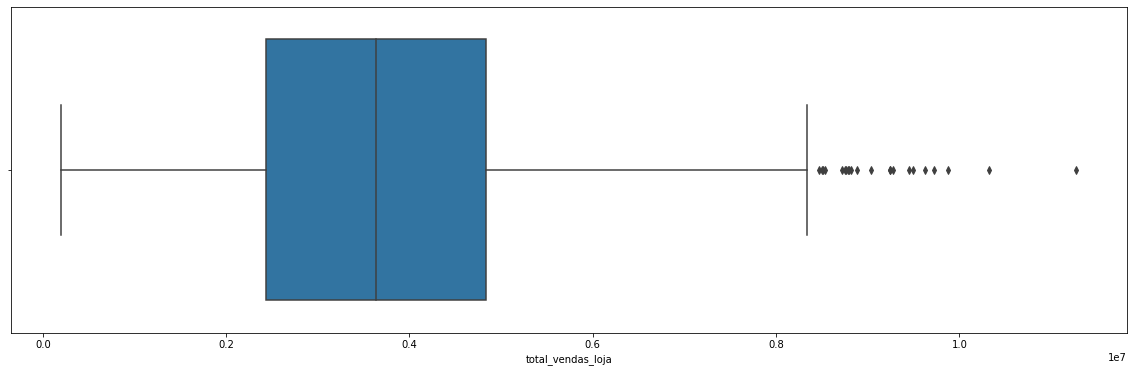

In [51]:
# Criando o boxplot com seaborn e ajustando o tamanho da figura
plt.figure(figsize=(20, 6))  # Defina o tamanho desejado, por exemplo, (largura, altura)
sns.boxplot(x=total_vendas_por_loja['total_vendas_loja'])
plt.show()

In [52]:
aux['vendas_liq'].max()

11272209.620883811

In [53]:
aux.head()

,loja,data_x,feriado,tipo,tamanho,combustivel,desemprego,distancia_competidores,clientes,week_of_year,tipo_de_loja,desconto,data_y,total_vendas_loja,vendas_liq
0,17,2023-01-07,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0,2023-01-07,2.709261e+06,2.709261e+06
1,17,2023-01-07,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0,2023-01-14,4.771096e+06,4.771096e+06
2,17,2023-01-07,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0,2023-01-21,3.925272e+06,3.925272e+06
3,17,2023-01-07,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0,2023-01-28,2.606646e+06,2.606646e+06
4,17,2023-01-07,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0,2023-02-04,2.448465e+06,2.448465e+06


In [54]:
test.head()

,id,loja,setor,data,feriado
0,276064,20,16,11-25,sim
1,276065,39,14,11-25,sim
2,276066,40,5,11-25,sim
3,276067,24,92,11-25,sim
4,276068,22,20,11-25,sim


In [55]:
tab_unique(test)

,count,content
id,18068,"[276064, 276065, 276066, 276067, 276068, 27606..."
loja,45,"[20, 39, 40, 24, 22, 45, 21, 28, 31, 41, 17, 1..."
setor,81,"[16, 14, 5, 92, 20, 94, 98, 31, 37, 38, 21, 25..."
data,6,"[11-25, 12-02, 12-09, 12-16, 12-23, 12-30]"
feriado,2,"[sim, nao]"


In [56]:
df2.head()

,id,loja,setor,data,vendas_semanais,feriado,tipo,tamanho,combustivel,desemprego,distancia_competidores,clientes,week_of_year,tipo_de_loja,desconto
0,140679,17,93,2023-01-07,6283.00,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
1,140696,17,16,2023-01-07,1641.25,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
2,140701,17,4,2023-01-07,39775.45,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
3,140733,17,14,2023-01-07,29555.43,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
4,140742,17,48,2023-01-07,414.00,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0


In [57]:
df2.loc[df2['desconto'] > 0, :].shape[0]

0

In [58]:
df2.shape[0]

109798

In [59]:
df2.loc[df2['desconto'] > 0, :].shape[0]/df2.shape[0]

0.0

# 3. EXPLORATORY DATA ANALYSIS (EDA)

In [60]:
df3 = df2.copy()

In [61]:
df3.head()

,id,loja,setor,data,vendas_semanais,feriado,tipo,tamanho,combustivel,desemprego,distancia_competidores,clientes,week_of_year,tipo_de_loja,desconto
0,140679,17,93,2023-01-07,6283.00,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
1,140696,17,16,2023-01-07,1641.25,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
2,140701,17,4,2023-01-07,39775.45,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
3,140733,17,14,2023-01-07,29555.43,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
4,140742,17,48,2023-01-07,414.00,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0


## 3.1. Análise Univariada

### 3.1.1. Vendas

In [62]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
id,109798.0,205313.810115,37421.663032,140679.0000,172846.25000,205275.000000,237777.50000,270137.000000
loja,109798.0,21.852693,12.702829,1.0000,11.00000,21.000000,32.00000,45.000000
setor,109798.0,44.021321,30.853652,1.0000,17.00000,36.000000,74.00000,99.000000
vendas_semanais,109798.0,67433.612238,204755.166806,100.0000,3071.72000,9321.175000,25518.04500,999944.947336
feriado,109798.0,0.045793,0.209037,0.0000,0.00000,0.000000,0.00000,1.000000
tamanho,109798.0,101736.361309,75939.308856,0.0000,34875.00000,119557.000000,155083.00000,219622.000000
combustivel,109798.0,3.598831,0.226396,2.8910,3.56600,3.596658,3.68400,4.211000
desemprego,109798.0,0.080594,0.018562,0.0442,0.06934,0.078520,0.08523,0.140210
distancia_competidores,109798.0,300000.000000,0.000000,300000.0000,300000.00000,300000.000000,300000.00000,300000.000000
clientes,109798.0,507.233839,290.801846,1.0000,254.00000,517.000000,760.00000,999.000000


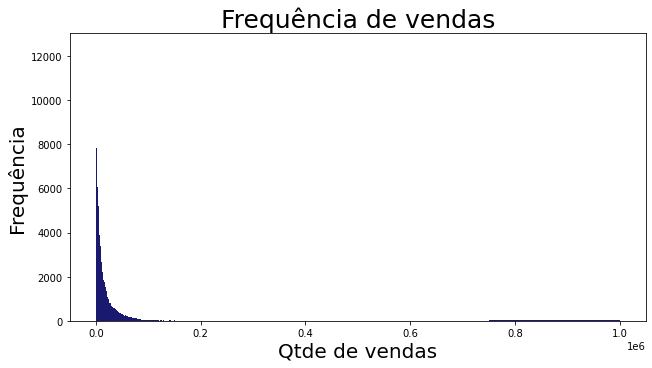

In [63]:
maximo = int(df3['vendas_semanais'].max())

# Cria o gráfico
fig = plt.figure( figsize = (8, 4))
ax = fig.add_axes([0, 0, 1, 1])

# Configura o título e os eixos
ax.set_title('Frequência de vendas', fontsize=25)
ax.set_xlabel('Qtde de vendas', fontsize=20)
ax.set_ylabel('Frequência', fontsize=20)

# Plota e mostra o gráfico
ax.hist(df3['vendas_semanais'], bins=range(0, maximo + 1001, 1000), color='midnightblue')
plt.show()

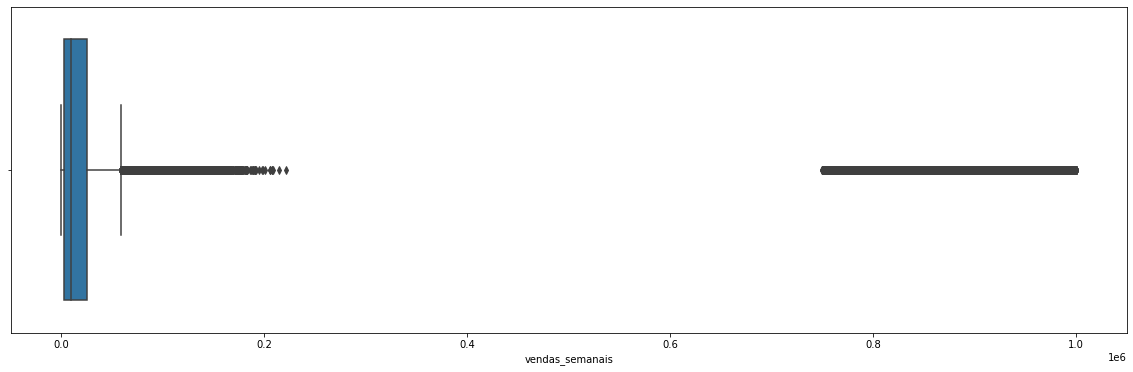

In [64]:
# Criando o boxplot com seaborn e ajustando o tamanho da figura
plt.figure(figsize=(20, 6))  # Defina o tamanho desejado, por exemplo, (largura, altura)
sns.boxplot(x=df3['vendas_semanais'])
plt.show()

In [65]:
df3.head()

,id,loja,setor,data,vendas_semanais,feriado,tipo,tamanho,combustivel,desemprego,distancia_competidores,clientes,week_of_year,tipo_de_loja,desconto
0,140679,17,93,2023-01-07,6283.00,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
1,140696,17,16,2023-01-07,1641.25,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
2,140701,17,4,2023-01-07,39775.45,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
3,140733,17,14,2023-01-07,29555.43,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0
4,140742,17,48,2023-01-07,414.00,0,eletronico,93188.0,2.891,0.06866,300000.0,541,01,B,0.0


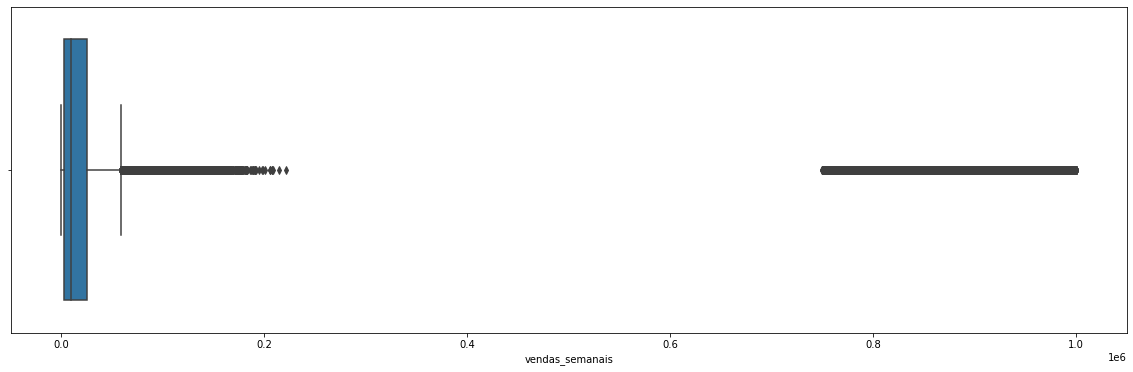

In [66]:
# Criando o boxplot com seaborn e ajustando o tamanho da figura
aux = df3[(df3['week_of_year'] != '45') | (df3['week_of_year'] != '46')]
plt.figure(figsize=(20, 6))  # Defina o tamanho desejado, por exemplo, (largura, altura)
sns.boxplot(x=aux['vendas_semanais'])
plt.show()

#### 3.1.1.1. Análise de outliers

In [ ]:
q1 = df3['vendas_semanais'].quantile(0.25)
q3 = df3['vendas_semanais'].quantile(0.75)

In [ ]:
iqr = q3 - q1
iqr

In [ ]:
limite_superior = q3 + 1.5 * iqr
limite_inferior = q1 - 1.5 * iqr

In [ ]:
limite_superior

In [ ]:
limite_inferior

In [ ]:
df3.loc[df3['vendas_semanais'] < 0, :]

### 3.1.2. Tamanho da loja

In [ ]:
maximo = int(df3['tamanho'].max())

# Cria o gráfico
fig = plt.figure( figsize = (8, 4))
ax = fig.add_axes([0, 0, 1, 1])

# Configura o título e os eixos
ax.set_title('Frequência de vendas', fontsize=25)
ax.set_xlabel('Qtde de vendas', fontsize=20)
ax.set_ylabel('Frequência', fontsize=20)

# Plota e mostra o gráfico
ax.hist(df3['tamanho'], bins=range(0, maximo + 1001, 1000), color='midnightblue')
plt.show()

In [ ]:
# Criando o boxplot com seaborn e ajustando o tamanho da figura
plt.figure(figsize=(20, 6))  # Defina o tamanho desejado, por exemplo, (largura, altura)
sns.boxplot(x=df3['tamanho'])
plt.show()

In [ ]:
# Criando o boxplot com seaborn e ajustando o tamanho da figura
plt.figure(figsize=(20, 6))  # Defina o tamanho desejado, por exemplo, (largura, altura)
sns.boxplot(x='tamanho', data=aux)
plt.show()

In [ ]:
aux = df3.loc[df3['tamanho']!=df3['tamanho'].median(), :].reset_index()
aux

In [ ]:
aux2 = df3.loc[df3['tamanho']==df3['tamanho'].median(), :].reset_index()
aux2

In [ ]:
aux2['vendas_semanais'].std()

## 3.2. Análise bivariada

### 3.2.1. Vendas por sazonalidade

In [ ]:
vendas_por_dia_da_semana = df3.groupby('week_of_year')['vendas_semanais'].sum().reset_index()
vendas_por_dia_da_semana.head()

# Cria o gráfico
fig = plt.figure(figsize=(20,5))
ax = fig.add_axes([0,0,1,1])

# Define a lista de cores e destaca a maior
colors = ['midnightblue']*7
max_sales_idx = np.argmax(vendas_por_dia_da_semana['vendas_semanais'])

# Configura o título e os eixos
ax.set_title('Vendas por semana', fontsize=25, pad=10)
ax.set_xlabel('Semana', fontsize=20)
ax.set_ylabel('$ vendas semanais', fontsize=20)

# Plota e mostra o gráfico
ax.bar(vendas_por_dia_da_semana['week_of_year'], vendas_por_dia_da_semana['vendas_semanais'])
plt.show()

### 3.2.2. Vendas por tipo

In [ ]:
vendas_por_tipo = df2.loc[:, :].groupby('tipo').sum().reset_index()
vendas_por_tipo.head()

# Cria o gráfico
fig = plt.figure(figsize=(20,5))
ax = fig.add_axes([0,0,1,1])

# Define a lista de cores e destaca a maior
colors = ['midnightblue']*7
max_sales_idx = np.argmax(vendas_por_tipo['vendas_semanais'])

# Configura o título e os eixos
ax.set_title('Vendas por tipo', fontsize=25, pad=10)
ax.set_xlabel('Tipo', fontsize=20)
ax.set_ylabel('$ vendas semanais', fontsize=20)

# Plota e mostra o gráfico
ax.bar(vendas_por_tipo['tipo'], vendas_por_tipo['vendas_semanais'])
plt.show()

### 3.2.3. Vendas por setor

In [ ]:
df3['setor'].nunique()

In [ ]:
vendas_por_setor = df2.loc[:, :].groupby('setor').sum().reset_index()
vendas_por_setor.head()

# Cria o gráfico
fig = plt.figure(figsize=(20,5))
ax = fig.add_axes([0,0,1,1])

# Define a lista de cores e destaca a maior
colors = ['midnightblue']*7
max_sales_idx = np.argmax(vendas_por_setor['vendas_semanais'])

# Configura o título e os eixos
ax.set_title('Vendas por setor', fontsize=25, pad=10)
ax.set_xlabel('Setor', fontsize=20)
ax.set_ylabel('$ vendas semanais', fontsize=20)

# Plota e mostra o gráfico
ax.bar(vendas_por_setor['setor'], vendas_por_setor['vendas_semanais'])
plt.show()

### 3.2.4. Vendas semanais por setor

## 3.1. Análise Multivariada

### 3.1.1. Profile

In [ ]:
profile = ydata_profiling.ProfileReport(df3, minimal=False)

profile = df3.profile_report(
    correlations={
        "pearson": {"calculate": True},
        "spearman": {"calculate": True},
        "kendall": {"calculate": True},
        "cramers": {"calculate": True},
        "phi_k": {"calculate": False},
    },)

In [ ]:
#profile

### 3.1.2. HeatMap

In [ ]:
# Criar o mapa de calor
corr = df3.corr(method='pearson')
fig, ax = plt.subplots(figsize=(16, 11))

# Configura o título e os eixos
ax.set_title('Mapa de calor', fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)

# Plota e mostra o gráfico
ax = sns.heatmap(corr, annot=True, cmap='Reds', ax=ax)
plt.show()

# 4. DATA PREPARATION

# 5. FEATURE SELECTION

## 5.1. Split dataframe into training and test

# 6. MACHINE LEARNING MODELING

## 6.1. Treinar, testar e medir

## 6.2. Validar métricas

# 7. ERROR TRANSLATION AND INTERPRETATION

# 8. DEPLOY / SUBMISSION